In [88]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline
from functions import *
from bokeh.plotting import figure, show
from sklearn.datasets import load_iris

In [54]:
# load the data
df = GetData()
df.head()

,SourceFileId,TripEndTime,VehicleId,TripDistance,DriveFuel,DriveFuelEconomy,DistanceAvgLoadFactor,Drivetime,StopIdleTime,StopIdleFuel,...,AvgLoadFactor,HardBrakesPr1000miles,BrakesPr1000miles,TopGearMinusOneUsage,IdleFuelPercentage,EngineBrakePercentage,CruisePercentage,OverSpeedAPercentage,OverSpeedBPercentage,EngineFanPercentage
2,28424,8/19/2016,281,161448.1,28200.13,5.73,0.50,10727712,3976920,1034.50,...,0.45,0.371636,353.327168,0.056143,0.036684,0.111953,0.409951,0.013890,0.000617,0.073740
3,39301,2/5/2017,281,161448.1,28200.13,5.73,0.50,10727712,3976920,1034.50,...,0.45,0.371636,353.327168,0.056143,0.036684,0.111953,0.409951,0.013890,0.000617,0.073740
4,40235,5/23/2017,281,161448.1,28200.13,5.73,0.50,10727712,3976920,1034.50,...,0.45,0.371636,353.327168,0.056143,0.036684,0.111953,0.409951,0.013890,0.000617,0.073740
5,40616,9/13/2017,281,161448.3,28200.38,5.73,0.50,10727856,3976920,1034.50,...,0.45,0.371636,353.332925,0.056143,0.036684,0.111951,0.409945,0.013889,0.000617,0.073739
6,40694,11/6/2017,253,4572.5,774.00,5.91,0.51,286452,333288,34.25,...,0.45,0.656096,287.151449,0.303249,0.044251,0.476562,0.071635,0.255750,0.316451,1.188639


In [55]:
#select the features
X = df[['DistanceAvgLoadFactor', 'StopIdlePercent', 'DistanceAvgvehiclespeed','TopGearMinusOneUsage', 'HardBrakesPr1000miles', \
           'BrakesPr1000miles', 'IdleFuelPercentage', 'EngineBrakePercentage', 'CruisePercentage', 'OverSpeedBPercentage', \
           'OverSpeedAPercentage', 'EngineFanPercentage']]
y = df['DriveFuelEconomy']

In [72]:
regr = RandomForestRegressor(max_depth=12, random_state=0)
regr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [73]:
regr.score(X,y)

0.95085615325201633

In [58]:
regr.feature_importances_

array([ 0.56232148,  0.0316351 ,  0.13819527,  0.084091  ,  0.01719703,
        0.02455549,  0.01164194,  0.02767542,  0.02129606,  0.01992402,
        0.03782169,  0.02364549])

In [ ]:
features = ['DistanceAvgLoadFactor', 'StopIdlePercent', 'DistanceAvgvehiclespeed','TopGearMinusOneUsage', 'HardBrakesPr1000miles', \
           'BrakesPr1000miles', 'IdleFuelPercentage', 'EngineBrakePercentage', 'CruisePercentage', 'OverSpeedBPercentage', \
           'OverSpeedAPercentage', 'EngineFanPercentage']

In [109]:
y1 = [x for x in range(len(X.columns))]
y1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [110]:
importances = regr.feature_importances_
indices = np.argsort(importances)
f = [features[i] for i in indices]

In [111]:
p = figure(plot_width = 400, plot_height=400, y_range=f)

In [112]:
p.hbar(y = y1,right=importances[indices],height=0.5,left=0)

GlyphRenderer(id='5f69139d-646b-44f7-b98a-1a2908e7bd8d', ...)

In [113]:
show(p)

array([ 0.01099714,  0.01662787,  0.01850381,  0.02212932,  0.02399676,
        0.02444138,  0.02629072,  0.03280018,  0.03777102,  0.08430265,
        0.13876609,  0.56337306])

Text(0.5,0,'Relative Importance')

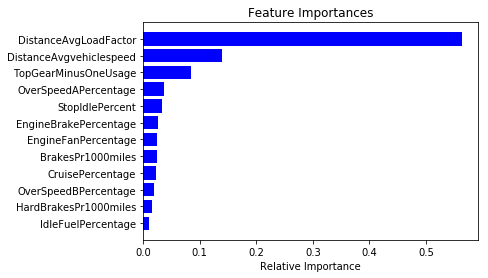

In [94]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), f)
plt.xlabel('Relative Importance')

In [89]:
iris = load_iris()

In [90]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']